# Working with SAFE

This tutorial shows how to use `sen2nbar` with a SAFE image:

In [1]:
import xarray as xr
import rioxarray
from sen2nbar.nbar import nbar_SAFE

We just need the path to the SAFE (yes, it is that easy!):

In [2]:
SAFE = "S2A_MSIL2A_20230223T075931_N0509_R035_T35HLC_20230223T120656.SAFE"
nbar_SAFE(SAFE)

All the NBAR images were saved in `S2A_MSIL2A_20230223T075931_N0509_R035_T35HLC_20230223T120656.SAFE/NBAR`. Note that the DN values are shifted automatically when PROCESSING_BASELINE is greater than 04.00.

This is a simple function to open the RGB bands:

In [3]:
def open_RGB(rgb_path, ext, shift_dn):
    rgb = [rioxarray.open_rasterio(f"{SAFE}/{rgb_path}/T35HLC_20230223T075931_B0{x}_10m.{ext}") for x in [4,3,2]]
    rgb = xr.concat(rgb, dim="band")
    rgb = rgb.assign_coords(dict(band=["r","g","b"]))
    if shift_dn:
        rgb = rgb - 1000
    return rgb

And this function opens both reflectance levels (SR and NBAR), preparing them for plotting:

In [4]:
def open_data_for_vis(vmax=2000):
    RGB_SR = open_RGB("GRANULE/L2A_T35HLC_A040072_20230223T081836/IMG_DATA/R10m", "jp2", True)
    RGB_NBAR = open_RGB("NBAR", "tif", False)
    RGB = xr.concat([RGB_SR, RGB_NBAR],dim="reflectance")
    RGB = RGB.assign_coords(dict(reflectance=["SR","NBAR"]))/vmax
    return RGB.clip(0,1)

Open the RGB:

In [5]:
rgb = open_data_for_vis()

Plot both reflectance levels:

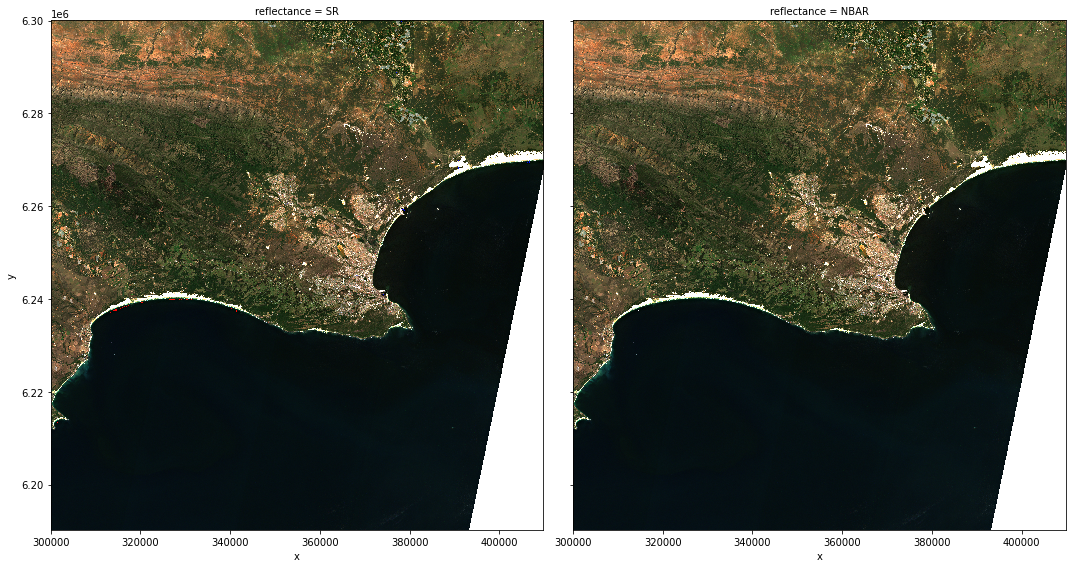

In [6]:
rgb.plot.imshow(col="reflectance",figsize=(15,8))

You can also plot the differences:

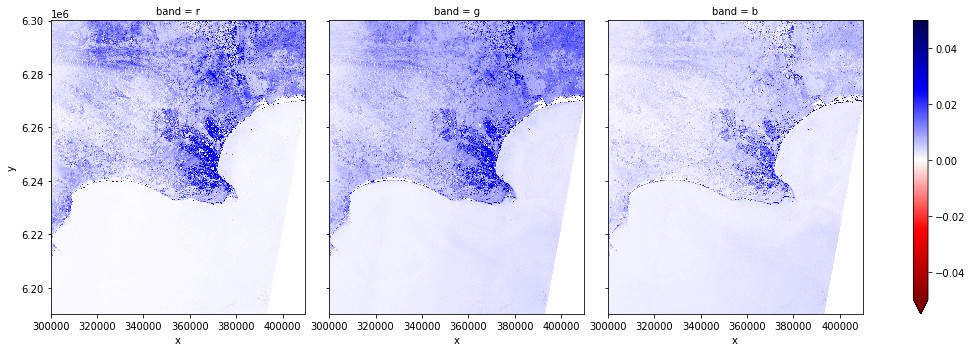

In [6]:
(rgb.sel(reflectance="NBAR") - rgb.sel(reflectance="SR")).plot.imshow(col="band",vmin=-0.05,vmax=0.05,cmap="seismic_r",figsize=(15,5))